In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os

In [2]:
file_path = r'C:\Users\aghaa\OneDrive\000A - Finished My Python Coding Files\data\car+evaluation\car.data'
if os.path.exists(file_path):
    print('File Exists')
    try: 
        df = pd.read_csv(filepath_or_buffer=file_path, header=None)
        print(df.head())
    except Exception as e:
        print(f'Error reading file: {e}')
else:
    print('File does not exist')
    input('Please enter a valid file path')


File Exists
       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


In [3]:
print('Number of Observations:', df.shape[0], 'Number of Variables:', df.shape[1])

Number of Observations: 1728 Number of Variables: 7


In [4]:
expected_columns = 7
if df.shape[1] == expected_columns:
    column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
    df.rename(columns=dict(zip(df.columns, column_names)), inplace=True)
    print(df.head())

else:
    print(f'Warning: Expected {expected_columns} columns but found {df.shape[1]} columns')

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [6]:
for col in df.columns:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


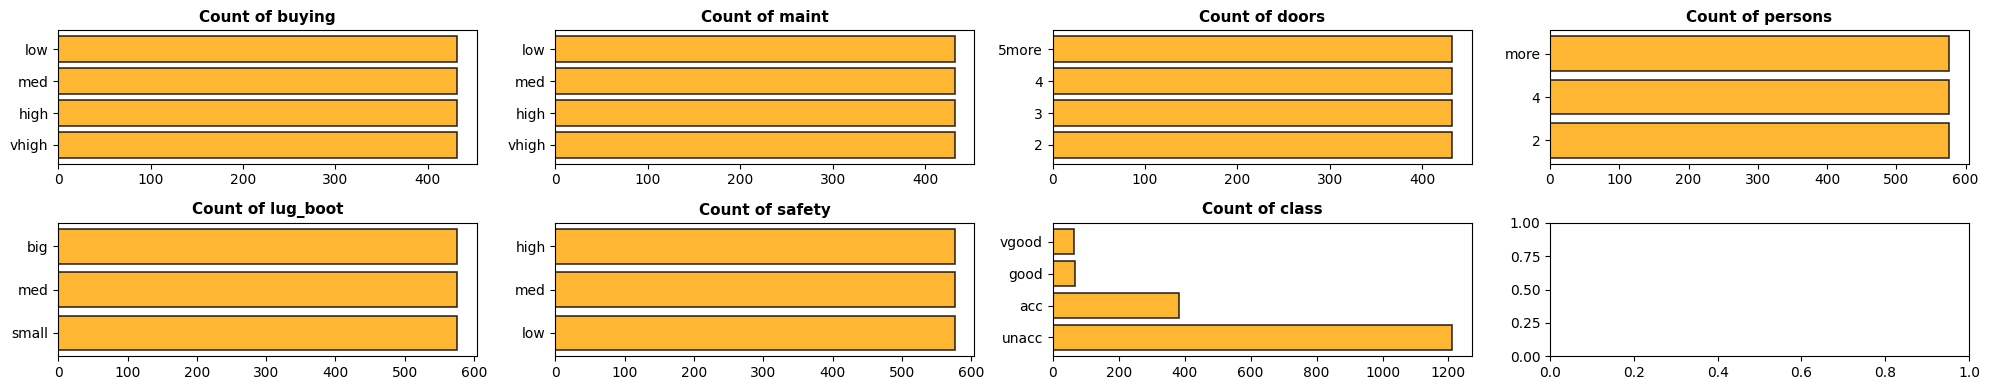

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 4))
for i, col in enumerate(df.columns):
    ax = axes[i // 4, i % 4]
    ax.barh(y=df[col].value_counts().index, width=df[col].value_counts(), color='orange', edgecolor='black', linewidth=1.2, alpha=0.8)
    ax.set_title(f'Count of {col}', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
one_hot_encoder = preprocessing.OneHotEncoder(sparse_output=False)  # Here we set sparse_output=False to get a dense array instead of a sparse matrix

one_hot_encoder.fit(df[['class']])  # df['class']: This extracts a single column from the DataFrame as a Series object (one-dimensional array like structure).
                                    # df[['class']]: This extracts a single column from the DataFrame as a DataFrame object(two-dimensional table wih a single column).

class_encoded = one_hot_encoder.transform(df[['class']])    # output (ndarray or spmatrix) a dense array or a sparse matrix depending on the value of sparse_output.
                                                            # If you set sparse_output=True, the output will be a sparse matrix. 
                                                            # You can then convert it to a dense array using the .toarray() function.

encoded_df = pd.DataFrame(class_encoded, columns=one_hot_encoder.get_feature_names_out(['class']))  # Using get_feature_names_out() to get the names of the new columns

df = pd.concat([df, encoded_df], axis=1)  # Concatenating the original DataFrame with the encoded DataFrame (encoded_df using axis=1).

df.head()

,buying,maint,doors,persons,lug_boot,safety,class,class_acc,class_good,class_unacc,class_vgood
0,vhigh,vhigh,2,2,small,low,unacc,0.0,0.0,1.0,0.0
1,vhigh,vhigh,2,2,small,med,unacc,0.0,0.0,1.0,0.0
2,vhigh,vhigh,2,2,small,high,unacc,0.0,0.0,1.0,0.0
3,vhigh,vhigh,2,2,med,low,unacc,0.0,0.0,1.0,0.0
4,vhigh,vhigh,2,2,med,med,unacc,0.0,0.0,1.0,0.0


##### **Explanation**
The difference between df['class'] and df[['class']]

In [26]:
df['class'].head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [ ]:
print(f"Type of df[['class']]: {type(df['class'])}") # df['class']: This extracts a single column from the DataFrame as a [Series] object
print("Number of dimensions of df['class']: ", df['class'].ndim)
print("Shape of df['class']: ", df['class'].shape)

Type of df[['class']]: <class 'pandas.core.series.Series'>
Number of dimensions of df['class']:  1
Shape of df['class']:  (1728,)


In [23]:
df[['class']].head()

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [ ]:
print(f"Type of df[['class']]: {type(df[['class']])}") # df[['class']]: This extracts a single column from the DataFrame as a [DataFrame] object
print(f"Number of dimensions of df[['class']]: {df[['class']].ndim}")
print(f"Shape of df[['class']]: {df[['class']].shape}")

Type of df[['class']]: <class 'pandas.core.frame.DataFrame'>
Number of dimensions of df[['class']]: 2
Shape of df[['class']]: (1728, 1)


-----------
-----------

##### **Explanation**
The difference between preprocessing.OneHotEncoder() and preprocessing.OneHotEncoder(sparse_output=False)

##### **preprocessing.OneHotEncoder()**

In [51]:
one_hot_encoder = preprocessing.OneHotEncoder()  # sparse_output=True as default. We get a sparse matrix instead of a numpy array.
one_hot_encoder.fit(df[['class']])

class_encoded = one_hot_encoder.transform(df[['class']]) # Output: A sparse matrix (as sparse_output=True)

In [ ]:
# print(class_encoded)
# Example of the output of a sparse matrix: 
"""
(np.int32(1715), np.int32(3))	1.0 # Resemble [0, 0, 0, 1]
(np.int32(1716), np.int32(2))	1.0 # Resemble [0, 0, 1, 0]
(np.int32(1717), np.int32(1))	1.0 # Resemble [0, 1, 0, 0]
"""

In [ ]:
print(f"Type of class_encoded: {type(class_encoded)}") # scipy.sparse (a sparse matrix)
print(f"Number of dimensions of class_encoded: {class_encoded.ndim}")
print(f"Shape of class_encoded: {class_encoded.shape}")

Type of class_encoded: <class 'scipy.sparse._csr.csr_matrix'>
Number of dimensions of class_encoded: 2
Shape of class_encoded: (1728, 4)


##### **preprocessing.OneHotEncoder(sparse_output=False)**

In [56]:
one_hot_encoder = preprocessing.OneHotEncoder(sparse_output=False)  # Set sparse_output=False. We get a numpy array instead of a sparse matrix.
one_hot_encoder.fit(df[['class']])

class_encoded = one_hot_encoder.transform(df[['class']]) # Output: A numpy array (as sparse_output=False)

In [ ]:
# print(class_encoded)
# Example of the output of a dense array (numpy.ndarray): 
"""
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
"""

In [58]:
print(f"Type of class_encoded: {type(class_encoded)}") # numpy.ndarray (a numpy array)
print(f"Number of dimensions of class_encoded: {class_encoded.ndim}")
print(f"Shape of class_encoded: {class_encoded.shape}")

Type of class_encoded: <class 'numpy.ndarray'>
Number of dimensions of class_encoded: 2
Shape of class_encoded: (1728, 4)


-----------
-----------

A dense NumPy array and a sparse matrix are two different data representations used for handling arrays, 
particularly when dealing with data that has many zeros.

1. Dense NumPy Array: 
- Explicitly stores every value in the array, including zeros.
- It requires memory proportional to the number of elements, regardless of their values.
- Example
[[1 0 0]
 [0 2 0]
 [0 0 3]]
- Simple to work with and good when the majority of the data is non-zero.
- Consumes more memory when there are many zeros (inefficient for sparse data).

2. Sparse Matrix:
- A compact representation that only stores the non-zero elements and their positions. 
- It reduces memory usage significantly for data with many zeros.
- Implemented in libraries like SciPy (scipy.shparse) and scikit-learn.
- Memory depends on the number of non-zero elements, making it more efficient for sparse data.
- Example
from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix([
    [1, 0, 0, 0],
    [0, 2, 0, 0],
    [0, 0, 3, 1]
])
print(sparse_matrix)
Output:
  (np.int32(0), np.int32(0))	1
  (np.int32(1), np.int32(1))	2
  (np.int32(2), np.int32(2))	3
  (np.int32(2), np.int32(3))	1
- Efficient memory usage for large datasets with many zeros.
- Useful for machine learning applications like OneHotEncoding.
- Not directly compatible with some operations or libraries that expect dense arrays.
- May require conversions to dense format for certain tasks, which can negate memory savings.

Conversion Between Sparse and Dense
Sparse to Dense:
dense_array = sparse_matrix.toarray()

Dense to Sparse:
sparse_matrix = csr_matrix(dense_array)
Efficient use of these formats depends on the nature of your dataset and the operations you plan to perform.